Inviscid theory from Giffen and Muraszew (1953) for predicting spray cone angle based upon simplex dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Relevant simplex dimensions
Ds    = 0.0032           #(m)   swirl chamber diameter
d0    = 8e-4             #(m)   orifice diameter
Rpipe = 0.000185         #(m)   radius of inlet pipes
Apipe = np.pi*(Rpipe)**2 #(m^2) cross section area of pipe

# Calculate atomizer constant K for simulation
K_sim = (2*Apipe)/(Ds*d0)  # Using factor of 2 becuase want total inlet ports area
print(K_sim)
# SCA measured from Sim
SCA_sim = 55.6

0.0840007879446177


In [3]:
# Arrays for looping and storage
sca = []        # Storage for calculated swirl cone angles
K_range = np.logspace(-5,1,200)


for K in K_range:
    # coefficents of polynomial 
    coeff=[1,0,((2.0*K**2)-3.0),0,3,0,-1]
    # solve for roots and take maximum, real value
    roots = 0.0
    roots = np.roots(coeff)
    roots = roots[~np.iscomplex(roots)]
    R0    = 0.0
    R0    = np.max(roots)
    R0    = R0.real
    # calculate discharge coeffiecent 
    CD = 0.0
    CD = np.sqrt((K**2*R0**2*(1-R0**2)**2)/(K**2*R0**2+(1.0-R0**2)**2))
    # calculate swirl cone angle
    alpha = 0.0
    alpha = np.arccos((1-R0**2)/(2.0*CD)+(CD)/(2.0*(1.0-R0**2))+(CD/(K**2))*np.log(R0))
    alpha = np.degrees(alpha)
    # Append array
    sca.append(alpha)

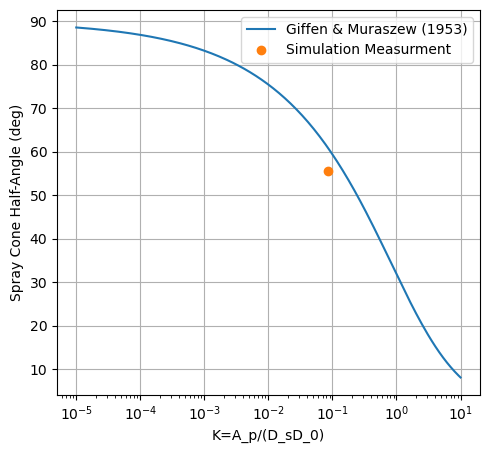

In [4]:
# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.semilogx(K_range,sca, label='Giffen & Muraszew (1953)')
plt.semilogx(K_sim,SCA_sim, label='Simulation Measurment', marker='o',linestyle='None' )
plt.xlabel('K=A_p/(D_sD_0)')
plt.ylabel('Spray Cone Half-Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

SCA approximation based upon liquid properties and atomizer geometry (Rizk and Lefebvre)

In [5]:
# liquid properties
rho_l = 1000
viscL_array = np.logspace(1e-3,1e-2,100)
deltaPL = 680000       
